<a href="https://colab.research.google.com/github/tymepas/GenAI_30days/blob/main/GAI_D6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preceptron

In [3]:
import numpy as np
def perceptron(x):
    weights = np.array([0.5, -0.5])
    bias = -0.2
    weighted_sum = np.dot(weights, x) + bias
    return 1 if weighted_sum > 0 else 0

inputs = np.array([1, 1])
print(perceptron(inputs))

0


# Activation Functions

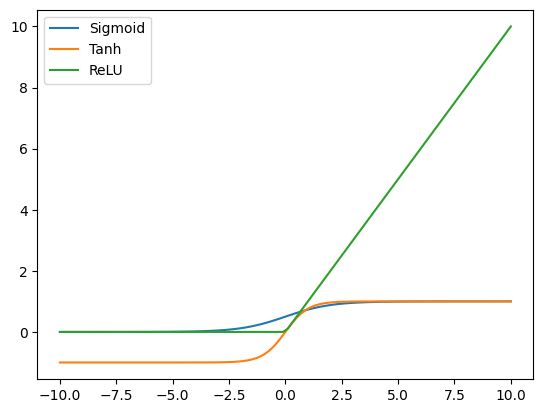

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.legend()
plt.show()

# Project: MNIST Classification with Neural Network

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8638 - loss: 0.4702 - val_accuracy: 0.9572 - val_loss: 0.1428
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9673 - loss: 0.1117 - val_accuracy: 0.9686 - val_loss: 0.1032
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9781 - loss: 0.0743 - val_accuracy: 0.9708 - val_loss: 0.0984
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0589 - val_accuracy: 0.9731 - val_loss: 0.0882
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9873 - loss: 0.0400 - val_accuracy: 0.9707 - val_loss: 0.0988


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9714 - loss: 0.1049
Test accuracy: 0.9747999906539917


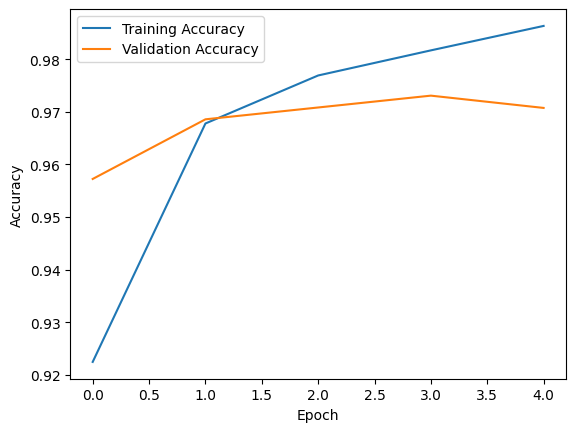

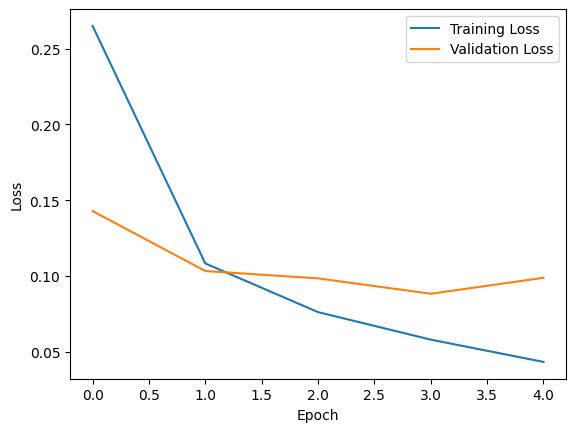

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()